# S1: Importing data and dependencies:

In [2]:
!pip install sdv


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import shap
import socket
import matplotlib.pyplot as plt
from tqdm import tqdm

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [5]:
import seaborn as sns
import os
import gc
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [7]:
from sdv.single_table import CTGANSynthesizer
from sklearn.utils import resample

In [9]:
df = pd.read_csv('../data/raw/output.csv')

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_37924\537082916.py:1: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/output.csv')


In [10]:
df.describe()

,Unnamed: 0,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,flow_duration,fwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,is_attack
count,3.243188e+06,3.243188e+06,3.243188e+06,3243188.0,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,...,3243188.0,3243188.0,3243188.0,3243188.0,3243188.0,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06
mean,1.621594e+06,3.634365e+04,2.211043e+04,0.0,4.403567e+00,3.486160e+02,1.493543e-01,6.706498e+00,4.452592e-01,1.112331e+01,...,0.0,0.0,0.0,0.0,0.0,3.683129e+03,3.532748e+03,5.405899e+02,1.587690e+02,7.635305e-01
std,9.362279e+05,1.887212e+04,2.108410e+04,0.0,2.652355e+01,1.760810e+03,3.857696e-01,2.646323e+01,1.291482e+00,7.712782e+01,...,0.0,0.0,0.0,0.0,0.0,1.417519e+04,1.453626e+04,2.117687e+03,1.433575e+03,4.249138e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.107968e+05,2.139575e+04,1.883000e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.621594e+06,3.932700e+04,1.513600e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.432390e+06,5.248400e+04,4.029900e+04,0.0,1.000000e+00,6.100000e+01,0.000000e+00,0.000000e+00,2.160000e-04,3.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.024000e+03,0.000000e+00,5.120000e+02,0.000000e+00,1.000000e+00
max,3.243187e+06,6.553400e+04,6.553500e+04,0.0,2.950000e+02,1.711000e+04,1.200000e+01,1.312000e+03,4.999897e+00,2.448100e+04,...,0.0,0.0,0.0,0.0,0.0,6.553500e+04,6.553500e+04,6.553500e+04,6.516000e+04,1.000000e+00


In [11]:
df.isnull().sum()

Unnamed: 0              0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
                       ..
bwd_init_window_size    0
fwd_last_window_size    0
bwd_last_window_size    0
traffic                 0
is_attack               0
Length: 102, dtype: int64

In [12]:
df['traffic'].value_counts()

traffic
camoverflow     1640039
normal           766915
netscan          467093
rudeadyet        131081
apachekiller      84579
mqttmalaria       69623
slowloris         63608
arpspoofing       11236
slowread           9014
Name: count, dtype: int64

In [13]:
df.select_dtypes(include=['float64', 'int64']).columns.tolist()

['Unnamed: 0',
 'id.orig_p',
 'id.resp_p',
 'missed_bytes',
 'orig_pkts',
 'orig_ip_bytes',
 'resp_pkts',
 'resp_ip_bytes',
 'flow_duration',
 'fwd_pkts_tot',
 'bwd_pkts_tot',
 'fwd_data_pkts_tot',
 'bwd_data_pkts_tot',
 'fwd_pkts_per_sec',
 'bwd_pkts_per_sec',
 'flow_pkts_per_sec',
 'down_up_ratio',
 'fwd_header_size_tot',
 'fwd_header_size_min',
 'fwd_header_size_max',
 'bwd_header_size_tot',
 'bwd_header_size_min',
 'bwd_header_size_max',
 'flow_FIN_flag_count',
 'flow_SYN_flag_count',
 'flow_RST_flag_count',
 'fwd_PSH_flag_count',
 'bwd_PSH_flag_count',
 'flow_ACK_flag_count',
 'fwd_URG_flag_count',
 'bwd_URG_flag_count',
 'flow_CWR_flag_count',
 'flow_ECE_flag_count',
 'fwd_pkts_payload.min',
 'fwd_pkts_payload.max',
 'fwd_pkts_payload.tot',
 'fwd_pkts_payload.avg',
 'fwd_pkts_payload.std',
 'bwd_pkts_payload.min',
 'bwd_pkts_payload.max',
 'bwd_pkts_payload.tot',
 'bwd_pkts_payload.avg',
 'bwd_pkts_payload.std',
 'flow_pkts_payload.min',
 'flow_pkts_payload.max',
 'flow_pkts_payl

# S2: Missing data handling and feature imputation

In [14]:
mask = (df == '-').any()
print(mask[mask])

service           True
duration          True
orig_bytes        True
resp_bytes        True
history           True
tunnel_parents    True
dtype: bool


In [15]:
df.replace('-', np.nan, inplace=True)

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_37924\32311047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)


In [16]:
missing = df.columns[df.isnull().any()].tolist()

In [17]:
df[missing].isnull().sum() * 100 / len(df)

service            87.569052
duration           61.243073
orig_bytes         61.243073
resp_bytes         61.243073
history            50.571906
tunnel_parents    100.000000
dtype: float64

In [18]:
for col in ['duration', 'orig_bytes', 'resp_bytes']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [19]:
if 'history' in df.columns:
    df['history'].fillna('unknown', inplace=True)

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_37924\1566594358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['history'].fillna('unknown', inplace=True)


In [20]:
df.drop(columns=['service', 'tunnel_parents'], inplace=True, errors='ignore')

In [21]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_37924\2907331251.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [22]:
df

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,0,10.10.10.252,48256,10.10.10.249,80,tcp,0.024381,13236.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
1,1,10.10.10.252,48258,10.10.10.249,80,tcp,0.024080,13236.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
2,2,10.10.10.252,48268,10.10.10.249,80,tcp,0.002000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,502,65160,apachekiller,1
3,3,10.10.10.252,48208,10.10.10.249,80,tcp,0.060782,13236.0,0.0,SH,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1
4,4,10.10.10.252,48180,10.10.10.249,80,tcp,0.060774,13236.0,0.0,SH,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243183,3243183,10.10.10.252,33506,10.10.10.249,80,tcp,0.004861,279.0,0.0,SH,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
3243184,3243184,10.10.10.252,5353,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,501,508,slowread,1
3243185,3243185,10.10.10.252,42790,10.10.10.249,80,tcp,0.000000,0.0,0.0,OTH,...,0.0,0.0,0.0,0.0,512,0,512,0,slowread,1
3243186,3243186,10.10.10.252,39610,10.10.10.249,80,tcp,0.044895,0.0,0.0,OTH,...,0.0,0.0,0.0,0.0,1825,509,1825,509,slowread,1


In [23]:
LABEL = 'traffic'

In [24]:
SAMPLES = 20000

In [25]:
spoof_df = df[df[LABEL] == 'arpspoofing'].copy()

In [26]:
spoof_df.shape

(11236, 100)

In [27]:
gen_spoof = SAMPLES - len(spoof_df)

In [28]:
gen_spoof

8764

In [29]:
from sdv.metadata import Metadata

In [30]:
metadata = Metadata.detect_from_dataframe(
    data=spoof_df,
    table_name='spoofing_table')

In [31]:
ctgan1 = CTGANSynthesizer(metadata, epochs=50, verbose=True)

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\sdv\single_table\base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [32]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [33]:
len(num_cols)

92

In [34]:
cat_cols = [c for c in df.columns if c not in num_cols + [LABEL, 'label']]

In [35]:
cat_cols

['id.orig_h',
 'id.resp_h',
 'proto',
 'conn_state',
 'local_orig',
 'local_resp',
 'history']

In [36]:
# df = df.drop(columns = ['id.orig_h', 'id.resp_h'], axis = 1)

In [37]:
# df

In [38]:
categorical_cols = ['proto', 'conn_state', 'local_orig', 'local_resp', 'history']

for col in categorical_cols:
    df[col] = df[col].astype(str).fillna("unknown")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [39]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [40]:
cat_cols = [c for c in df.columns if c not in num_cols + [LABEL, 'label']]

In [41]:
len(num_cols)

97

In [42]:
len(cat_cols)

2

In [43]:
ctgan1.fit(spoof_df)

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\ctgan\synthesizers\_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(
Gen. (-3.74) | Discrim. (-1.88): 100%|██████████| 50/50 [01:38<00:00,  1.97s/it]


In [44]:
fig = ctgan1.get_loss_values_plot()
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Generator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Generator Loss',
              'line': {'color': '#000036', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Generator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAwJNlAkAAAAAAVWrVPwAAAEDV1Q' ... 'CL+wPAAAAAQKgLAcAAAADAr+YNwA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Discriminator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Discriminator Loss',
              'line': {'color': '#01E0C9', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Discriminator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAQFKQDsAAAABA2RPPvwAAAMAcTt' ... 'A8Pfm/AAAA4JtyAMAAAAAAXgX+vw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'font': {'size': 18},
               'legend': {'orientation': 'v', 'title': {'text': ''}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'plot_bgcolor': '#F5F5F8',
               'template': '...',
               'title': {'text': 'CTGAN loss function'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Epoch'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Loss'}}}
})

In [45]:
synth_data = ctgan1.sample(gen_spoof)

In [46]:
synth_data

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,4267787,10.10.10.252,43025,224.0.0.251,5353,udp,0.003806,0.0,0.0,New Hampshire,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
1,5897036,10.10.10.252,43640,224.0.0.251,137,udp,0.000000,0.0,0.0,Wyoming,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
2,15908185,10.10.10.252,35525,10.10.10.249,5353,udp,0.004450,0.0,0.0,California,...,0.0,0.0,0.0,0.0,1825,509,1825,0,arpspoofing,1
3,12316139,10.10.10.252,37240,224.0.0.251,137,udp,0.002325,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
4,61713,10.10.10.252,51386,224.0.0.251,5353,udp,0.000000,0.0,0.0,New York,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,5976380,10.10.10.252,37594,224.0.0.251,5353,udp,0.001741,0.0,0.0,Kentucky,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
8760,1620377,10.10.10.252,41553,224.0.0.251,5353,udp,0.002277,0.0,0.0,California,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
8761,7199506,10.10.10.252,39327,224.0.0.251,5353,udp,0.000762,0.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
8762,5998597,10.10.10.252,60200,10.10.10.255,57621,udp,0.000000,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,0,509,24571,509,arpspoofing,1


In [47]:
spoof_balanced = pd.concat([spoof_df, synth_data], ignore_index=True)

In [48]:
spoof_balanced

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,84579,10.10.10.252,56248,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
1,84580,10.10.10.252,50214,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
2,84581,10.10.10.252,58369,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
3,84582,10.10.10.252,57377,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
4,84583,10.10.10.252,12345,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5976380,10.10.10.252,37594,224.0.0.251,5353,udp,0.001741,0.0,0.0,Kentucky,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
19996,1620377,10.10.10.252,41553,224.0.0.251,5353,udp,0.002277,0.0,0.0,California,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
19997,7199506,10.10.10.252,39327,224.0.0.251,5353,udp,0.000762,0.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
19998,5998597,10.10.10.252,60200,10.10.10.255,57621,udp,0.000000,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,0,509,24571,509,arpspoofing,1


In [49]:
balanced_parts = [spoof_balanced]

In [50]:
slowread_df = df[df[LABEL] == 'slowread'].copy()

In [51]:
metadata2 = Metadata.detect_from_dataframe(
    data=slowread_df,
    table_name='slowread_table')

In [52]:
ctgan2 = CTGANSynthesizer(metadata, epochs=50, verbose=True)

In [53]:
ctgan2.fit(slowread_df)

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\ctgan\synthesizers\_utils.py:16: FutureWarning:

`cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.

Gen. (-2.56) | Discrim. (-1.66): 100%|██████████| 50/50 [01:21<00:00,  1.64s/it]


In [54]:
fig2 = ctgan2.get_loss_values_plot()
fig2

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Generator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Generator Loss',
              'line': {'color': '#000036', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Generator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAYOooBUAAAAAA/5noPwAAAAB24O' ... 'AaxgDAAAAAwKqTCsAAAAAgh3kEwA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Discriminator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Discriminator Loss',
              'line': {'color': '#01E0C9', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Discriminator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAgEtOD8AAAACACHrUvwAAAAB0Z7' ... 'BPZ+q/AAAAgPFI6D8AAABAqJz6vw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'font': {'size': 18},
               'legend': {'orientation': 'v', 'title': {'text': ''}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'plot_bgcolor': '#F5F5F8',
               'template': '...',
               'title': {'text': 'CTGAN loss function'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Epoch'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Loss'}}}
})

In [55]:
gen_slowread = SAMPLES - len(slowread_df)

In [56]:
synth_data2 = ctgan2.sample(gen_slowread)

In [57]:
synth_data2

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,6192177,10.10.10.252,39157,10.10.10.249,80,1,0.004913,0.0,0.0,Mississippi,...,0.0,0.0,0.0,0.0,1152,508,0,508,slowread,1
1,12299054,10.10.10.252,42228,10.10.10.249,5353,1,0.002639,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,1152,65160,302,508,slowread,1
2,9579783,10.10.10.252,56959,10.10.10.249,80,1,0.053022,4.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,301,0,1152,508,slowread,1
3,12154906,10.10.10.252,45943,10.10.10.249,80,1,0.069914,0.0,0.0,Maryland,...,0.0,0.0,0.0,0.0,1152,65160,302,508,slowread,1
4,9426754,10.10.10.252,44692,10.10.10.249,80,1,0.046699,4.0,0.0,Utah,...,0.0,0.0,0.0,0.0,1152,508,0,508,slowread,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10981,11183272,10.10.10.252,36356,10.10.10.249,80,1,0.043207,251.0,0.0,Arizona,...,0.0,0.0,0.0,0.0,1152,65160,0,508,slowread,1
10982,13058653,10.10.10.252,47269,10.10.10.249,80,2,0.051161,1.0,0.0,Iowa,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
10983,5273497,10.10.10.252,35007,10.10.10.249,80,1,0.000000,1.0,0.0,North Dakota,...,0.0,0.0,0.0,0.0,1152,508,301,508,slowread,1
10984,9028790,10.10.10.252,56594,10.10.10.249,80,1,0.005496,1.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,1152,0,1152,0,slowread,1


In [58]:
slowread_balanced = pd.concat([slowread_df, synth_data2], ignore_index=True)

In [59]:
slowread_balanced

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,3234174,10.10.10.252,54590,10.10.10.249,80,1,0.047554,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,slowread,1
1,3234175,10.10.10.252,54606,10.10.10.249,80,1,0.048148,0.0,0.0,0,...,0.0,0.0,0.0,0.0,512,0,512,0,slowread,1
2,3234176,10.10.10.252,54570,10.10.10.249,80,1,0.048707,0.0,0.0,0,...,0.0,0.0,0.0,0.0,1825,509,1825,509,slowread,1
3,3234177,10.10.10.252,58256,10.10.10.249,80,1,0.042596,0.0,0.0,0,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
4,3234178,10.10.10.252,58250,10.10.10.249,80,1,0.042874,0.0,0.0,0,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,11183272,10.10.10.252,36356,10.10.10.249,80,1,0.043207,251.0,0.0,Arizona,...,0.0,0.0,0.0,0.0,1152,65160,0,508,slowread,1
19996,13058653,10.10.10.252,47269,10.10.10.249,80,2,0.051161,1.0,0.0,Iowa,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
19997,5273497,10.10.10.252,35007,10.10.10.249,80,1,0.000000,1.0,0.0,North Dakota,...,0.0,0.0,0.0,0.0,1152,508,301,508,slowread,1
19998,9028790,10.10.10.252,56594,10.10.10.249,80,1,0.005496,1.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,1152,0,1152,0,slowread,1


In [60]:
combined_df = pd.concat([spoof_balanced, slowread_balanced], ignore_index=True).drop_duplicates()

In [61]:
combined_df

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,84579,10.10.10.252,56248,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
1,84580,10.10.10.252,50214,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
2,84581,10.10.10.252,58369,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
3,84582,10.10.10.252,57377,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
4,84583,10.10.10.252,12345,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,11183272,10.10.10.252,36356,10.10.10.249,80,1,0.043207,251.0,0.0,Arizona,...,0.0,0.0,0.0,0.0,1152,65160,0,508,slowread,1
39996,13058653,10.10.10.252,47269,10.10.10.249,80,2,0.051161,1.0,0.0,Iowa,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
39997,5273497,10.10.10.252,35007,10.10.10.249,80,1,0.000000,1.0,0.0,North Dakota,...,0.0,0.0,0.0,0.0,1152,508,301,508,slowread,1
39998,9028790,10.10.10.252,56594,10.10.10.249,80,1,0.005496,1.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,1152,0,1152,0,slowread,1


In [63]:
df.head()

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,0,10.10.10.252,48256,10.10.10.249,80,1,0.024381,13236.0,0.0,5,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
1,1,10.10.10.252,48258,10.10.10.249,80,1,0.024080,13236.0,0.0,5,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
2,2,10.10.10.252,48268,10.10.10.249,80,1,0.002000,0.0,0.0,5,...,0.0,0.0,0.0,0.0,64240,65160,502,65160,apachekiller,1
3,3,10.10.10.252,48208,10.10.10.249,80,1,0.060782,13236.0,0.0,8,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1
4,4,10.10.10.252,48180,10.10.10.249,80,1,0.060774,13236.0,0.0,8,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1


In [64]:
EXCLUDE_CLASSES = ['arpspoofing', 'slowread']
SAMPLES_PER_CLASS = 20000
selected_parts = []

In [65]:
for cls, group in df.groupby('traffic'):
    if cls.lower() in EXCLUDE_CLASSES:
        continue  # skip these
    
    n_avail = len(group)
    # Sample 20k unique rows or all if fewer
    if n_avail >= SAMPLES_PER_CLASS:
        sampled = group.sample(n=SAMPLES_PER_CLASS, random_state=42, replace=False)
    else:
        sampled = group.sample(n=n_avail, random_state=42, replace=False)
    
    selected_parts.append(sampled)

# Combine selected samples
other_classes_df = pd.concat(selected_parts, ignore_index=True).drop_duplicates()

In [66]:
final_df = pd.concat([combined_df, other_classes_df], ignore_index=True).drop_duplicates()

In [68]:
final_df['traffic'].value_counts()

traffic
arpspoofing     20000
slowread        20000
apachekiller    20000
camoverflow     20000
mqttmalaria     20000
netscan         20000
normal          20000
rudeadyet       20000
slowloris       20000
Name: count, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target
le = LabelEncoder()
final_df['label_enc'] = le.fit_transform(final_df['traffic'])
X = final_df.drop(['traffic', 'is_attack', 'label_enc', 'id.resp_h', 'id.resp_h'], axis=1)
y = final_df['label_enc']

# Scale numeric features
X = X.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)

(126000, 91) (27000, 91) (27000, 91)



RandomForest Accuracy: 0.9993
              precision    recall  f1-score   support

apachekiller       1.00      1.00      1.00      3000
 arpspoofing       1.00      1.00      1.00      3000
 camoverflow       1.00      1.00      1.00      3000
 mqttmalaria       1.00      1.00      1.00      3000
     netscan       1.00      1.00      1.00      3000
      normal       1.00      1.00      1.00      3000
   rudeadyet       1.00      1.00      1.00      3000
   slowloris       1.00      1.00      1.00      3000
    slowread       1.00      1.00      1.00      3000

    accuracy                           1.00     27000
   macro avg       1.00      1.00      1.00     27000
weighted avg       1.00      1.00      1.00     27000



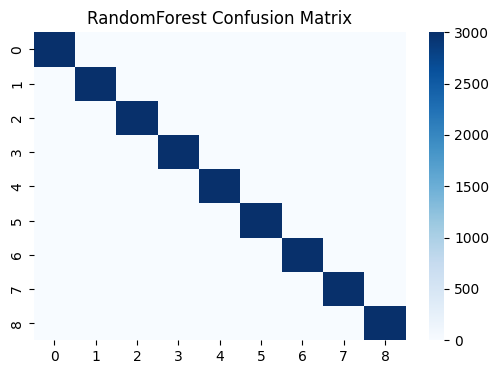

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[01:30:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





XGBoost Accuracy: 0.9999
              precision    recall  f1-score   support

apachekiller       1.00      1.00      1.00      3000
 arpspoofing       1.00      1.00      1.00      3000
 camoverflow       1.00      1.00      1.00      3000
 mqttmalaria       1.00      1.00      1.00      3000
     netscan       1.00      1.00      1.00      3000
      normal       1.00      1.00      1.00      3000
   rudeadyet       1.00      1.00      1.00      3000
   slowloris       1.00      1.00      1.00      3000
    slowread       1.00      1.00      1.00      3000

    accuracy                           1.00     27000
   macro avg       1.00      1.00      1.00     27000
weighted avg       1.00      1.00      1.00     27000



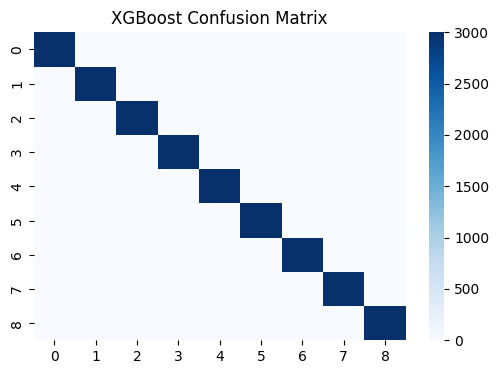

In [70]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "RandomForest": RandomForestClassifier(n_estimators=150, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=150, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    results[name] = acc
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [72]:
class CNN_BiLSTM_Attention(nn.Module):
    def __init__(self, input_len, num_classes, lstm_hidden=64, num_heads=4):
        super(CNN_BiLSTM_Attention, self).__init__()
        
        # CNN feature extractor
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding='same')
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding='same')
        self.pool = nn.MaxPool1d(2)
        
        # BiLSTM block
        self.bilstm = nn.LSTM(
            input_size=128,
            hidden_size=lstm_hidden,
            batch_first=True,
            bidirectional=True
        )

        # Multi-Head Self-Attention
        self.attention = nn.MultiheadAttention(embed_dim=2*lstm_hidden, num_heads=num_heads, batch_first=True)
        self.norm = nn.LayerNorm(2*lstm_hidden)

        # Dense layers
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(2*lstm_hidden, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input shape: (batch, seq_len, 1)
        x = x.permute(0, 2, 1)                 # (batch, 1, seq_len)
        x = torch.relu(self.conv1(x))          # (batch, 64, seq_len)
        x = torch.relu(self.conv2(x))          # (batch, 128, seq_len)
        x = self.pool(x)                       # (batch, 128, seq_len//2)
        
        # Prepare for LSTM: (batch, seq_len, features)
        x = x.permute(0, 2, 1)
        x, _ = self.bilstm(x)                  # (batch, seq_len//2, 2*lstm_hidden)
        
        # Multihead Self-Attention with residual connection
        attn_output, _ = self.attention(x, x, x)
        x = self.norm(x + attn_output)

        # Global average pooling over the sequence dimension
        x = x.permute(0, 2, 1)
        x = self.global_pool(x).squeeze(-1)    # (batch, 2*lstm_hidden)
        
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)                        # logits
        return x


Epoch 1/20 | Train Loss: 0.2653 | Val Loss: 0.0750 | Train Acc: 0.9152 | Val Acc: 0.9757
Epoch 2/20 | Train Loss: 0.0659 | Val Loss: 0.0464 | Train Acc: 0.9806 | Val Acc: 0.9848
Epoch 3/20 | Train Loss: 0.0413 | Val Loss: 0.0319 | Train Acc: 0.9867 | Val Acc: 0.9892
Epoch 4/20 | Train Loss: 0.0397 | Val Loss: 0.0285 | Train Acc: 0.9878 | Val Acc: 0.9900
Epoch 5/20 | Train Loss: 0.0268 | Val Loss: 0.0249 | Train Acc: 0.9911 | Val Acc: 0.9918
Epoch 6/20 | Train Loss: 0.0228 | Val Loss: 0.0362 | Train Acc: 0.9926 | Val Acc: 0.9888
Epoch 7/20 | Train Loss: 0.0230 | Val Loss: 0.0209 | Train Acc: 0.9927 | Val Acc: 0.9924
Epoch 8/20 | Train Loss: 0.0213 | Val Loss: 0.0187 | Train Acc: 0.9931 | Val Acc: 0.9935
Epoch 9/20 | Train Loss: 0.0180 | Val Loss: 0.0156 | Train Acc: 0.9940 | Val Acc: 0.9945
Epoch 10/20 | Train Loss: 0.0168 | Val Loss: 0.0128 | Train Acc: 0.9944 | Val Acc: 0.9957
Epoch 11/20 | Train Loss: 0.0156 | Val Loss: 0.0133 | Train Acc: 0.9949 | Val Acc: 0.9949
Epoch 12/20 | Train

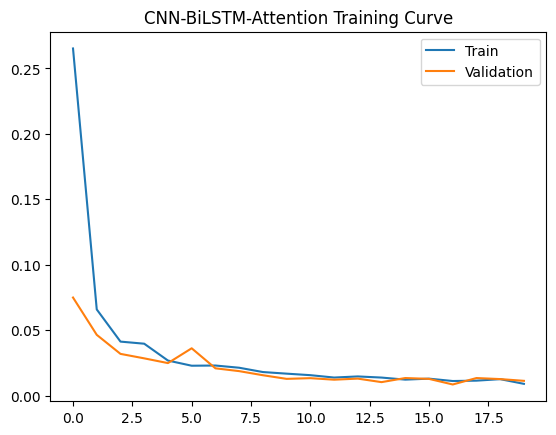

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset
X_train_t = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
X_val_t = torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)
y_train_t = torch.tensor(y_train.values, dtype=torch.long)
y_val_t = torch.tensor(y_val.values, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=128, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=128, shuffle=False)

# Model
num_classes = len(le.classes_)
input_len = X_train_t.shape[1]
model = CNN_BiLSTM_Attention(input_len, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
EPOCHS = 20

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(EPOCHS):
    # ---- Training ----
    model.train()
    total_loss = 0
    all_preds, all_labels = [], []

    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        preds = torch.argmax(out, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

    train_acc = accuracy_score(all_labels, all_preds)
    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # ---- Validation ----
    model.eval()
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            outputs = model(Xb)
            loss = criterion(outputs, yb)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(yb.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | "
          f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

# Plot loss
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Validation")
plt.legend()
plt.title("CNN-BiLSTM-Attention Training Curve")
plt.show()


In [76]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

def make_dataloaders(X_train, y_train, X_val, y_val, bs=128):
    # ensure numpy arrays (float32) and labels longs
    if hasattr(X_train, "values"): X_train = X_train.values
    if hasattr(X_val, "values"): X_val = X_val.values
    X_train = X_train.astype(np.float32)
    X_val   = X_val.astype(np.float32)
    y_train = np.array(y_train).astype(np.int64)
    y_val   = np.array(y_val).astype(np.int64)

    # shape -> (N, seq_len) expected. we will add channel dim in model if needed.
    train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
    val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))

    return (DataLoader(train_ds, batch_size=bs, shuffle=True, num_workers=4, pin_memory=True),
            DataLoader(val_ds,   batch_size=bs, shuffle=False, num_workers=4, pin_memory=True))

Device: cuda


In [77]:
import torch.nn as nn
import torch.nn.functional as F

class DenseNN(nn.Module):
    def __init__(self, input_dim, hidden_dims=[512,256,128], num_classes=6, dropout=0.4, leaky_slope=0.01):
        super().__init__()
        layers = []
        in_d = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(in_d, h))
            layers.append(nn.BatchNorm1d(h))
            layers.append(nn.LeakyReLU(negative_slope=leaky_slope))
            layers.append(nn.Dropout(dropout))
            in_d = h
        layers.append(nn.Linear(in_d, num_classes))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        # expect x: (batch, seq_len) or (batch, features)
        if x.dim() == 3:  # if (batch, seq_len, 1)
            x = x.squeeze(-1)
        return self.net(x)

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


# -------------------------------
# Positional Encoding (optional)
# -------------------------------
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model)
        )
        pe[:, 0::2] = torch.sin(pos * div_term)
        pe[:, 1::2] = torch.cos(pos * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x):
        seq_len = x.size(1)
        return x + self.pe[:, :seq_len, :]


# -------------------------------
# Residual Block for 1D conv
# -------------------------------
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding="same")
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding="same")
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.shortcut = (
            nn.Conv1d(in_channels, out_channels, kernel_size=1)
            if in_channels != out_channels else nn.Identity()
        )

    def forward(self, x):
        residual = self.shortcut(x)
        out = F.leaky_relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += residual
        out = F.leaky_relu(out)
        return out


# -------------------------------
# RCLNet_Attn_Pro (Tabular-ready)
# -------------------------------
class RCLNet_Attn_Pro(nn.Module):
    def __init__(self, input_features, num_classes):
        super(RCLNet_Attn_Pro, self).__init__()

        # Treat features as "sequence length = 1" if needed
        self.expand_dim = nn.Linear(input_features, input_features)
        self.res1 = ResidualBlock(1, 64)
        self.res2 = ResidualBlock(64, 128)
        self.pool = nn.AdaptiveMaxPool1d(32)

        # BiLSTM + Attention
        self.lstm = nn.LSTM(input_size=128, hidden_size=64, batch_first=True, bidirectional=True)
        self.attn = nn.MultiheadAttention(embed_dim=128, num_heads=4, dropout=0.2, batch_first=True)
        self.norm = nn.LayerNorm(128)

        # Dense classifier
        self.fc1 = nn.Linear(128, 256)
        self.drop = nn.Dropout(0.4)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        # x: (B, F)
        x = self.expand_dim(x).unsqueeze(1)  # (B, 1, F)

        x = self.res1(x)
        x = self.res2(x)
        x = self.pool(x)  # (B, 128, seq_len=32)
        x = x.permute(0, 2, 1)  # (B, seq_len, F)

        # BiLSTM + Attention
        x, _ = self.lstm(x)
        attn_out, _ = self.attn(x, x, x)
        x = self.norm(x + attn_out)

        # Global average pooling
        x = x.mean(dim=1)

        # Dense classifier
        x = F.leaky_relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return x

In [80]:
# Example instantiation
input_features = X_train.shape[1]           # number of columns
num_classes = len(np.unique(y_train))
model_dense = DenseNN(input_dim=input_features, num_classes=num_classes).to(device)

# For RCLNet_Attn_Pro instantiate like:
model_rcl = RCLNet_Attn_Pro(input_features=input_features, num_classes=num_classes, max_len=None).to(device)
# Note: RCLNet_Attn_Pro expects input (batch, seq_len, features). If your data is (N, F) use features as "seq_len" below.


In [81]:
import torch.optim as optim
from tqdm import tqdm

def train_eval(model, train_loader, val_loader, epochs=20, lr=1e-3, save_path="model.pth"):
    model = model.to(device)
    optimz = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    best_val_acc = 0.0
    history = {"train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}

    for epoch in range(1, epochs+1):
        model.train()
        train_losses = []
        train_preds, train_labels = [], []
        pbar = tqdm(train_loader, desc=f"Train E{epoch}")
        for xb, yb in pbar:
            xb, yb = xb.to(device).float(), yb.to(device).long()
            optimz.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimz.step()
            train_losses.append(loss.item())

            preds = logits.argmax(dim=1).detach().cpu().numpy()
            train_preds.extend(preds)
            train_labels.extend(yb.detach().cpu().numpy())
            pbar.set_postfix(loss=np.mean(train_losses))

        train_acc = accuracy_score(train_labels, train_preds)

        # validation
        model.eval()
        val_losses = []
        val_preds, val_labels = [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device).float(), yb.to(device).long()
                logits = model(xb)
                loss = criterion(logits, yb)
                val_losses.append(loss.item())
                preds = logits.argmax(dim=1).cpu().numpy()
                val_preds.extend(preds)
                val_labels.extend(yb.cpu().numpy())

        val_acc = accuracy_score(val_labels, val_preds)

        history["train_loss"].append(np.mean(train_losses))
        history["val_loss"].append(np.mean(val_losses))
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch}/{epochs}  TrainAcc {train_acc:.4f}  ValAcc {val_acc:.4f}  TrainLoss {history['train_loss'][-1]:.4f} ValLoss {history['val_loss'][-1]:.4f}")

        # save best model by val acc
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), save_path)
    print("Best val acc:", best_val_acc)
    return history

In [82]:
train_loader, val_loader = make_dataloaders(X_train, y_train, X_val, y_val, bs=128)
history = train_eval(model_dense, train_loader, val_loader, epochs=20, lr=1e-3, save_path="rclnet_best.pth")

Train E1: 100%|██████████| 985/985 [00:06<00:00, 150.50it/s, loss=0.164]


Epoch 1/20  TrainAcc 0.9582  ValAcc 0.9790  TrainLoss 0.1645 ValLoss 0.0707


Train E2: 100%|██████████| 985/985 [00:05<00:00, 172.88it/s, loss=0.0807]


Epoch 2/20  TrainAcc 0.9765  ValAcc 0.9806  TrainLoss 0.0807 ValLoss 0.0572


Train E3: 100%|██████████| 985/985 [00:06<00:00, 157.80it/s, loss=0.0681]


Epoch 3/20  TrainAcc 0.9786  ValAcc 0.9829  TrainLoss 0.0681 ValLoss 0.0536


Train E4: 100%|██████████| 985/985 [00:05<00:00, 174.27it/s, loss=0.06]  


Epoch 4/20  TrainAcc 0.9803  ValAcc 0.9521  TrainLoss 0.0600 ValLoss 0.0687


Train E5: 100%|██████████| 985/985 [00:06<00:00, 160.78it/s, loss=0.0529]


Epoch 5/20  TrainAcc 0.9835  ValAcc 0.9890  TrainLoss 0.0529 ValLoss 0.0417


Train E6: 100%|██████████| 985/985 [00:06<00:00, 163.94it/s, loss=0.0467]


Epoch 6/20  TrainAcc 0.9855  ValAcc 0.9907  TrainLoss 0.0467 ValLoss 0.0324


Train E7: 100%|██████████| 985/985 [00:05<00:00, 164.83it/s, loss=0.0439]


Epoch 7/20  TrainAcc 0.9864  ValAcc 0.9901  TrainLoss 0.0439 ValLoss 0.0340


Train E8: 100%|██████████| 985/985 [00:06<00:00, 160.47it/s, loss=0.0411]


Epoch 8/20  TrainAcc 0.9872  ValAcc 0.9536  TrainLoss 0.0411 ValLoss 0.0859


Train E9: 100%|██████████| 985/985 [00:06<00:00, 143.62it/s, loss=0.0396]


Epoch 9/20  TrainAcc 0.9877  ValAcc 0.9532  TrainLoss 0.0396 ValLoss 0.0988


Train E10: 100%|██████████| 985/985 [00:06<00:00, 156.59it/s, loss=0.0378]


Epoch 10/20  TrainAcc 0.9880  ValAcc 0.9766  TrainLoss 0.0378 ValLoss 0.0516


Train E11: 100%|██████████| 985/985 [00:05<00:00, 164.71it/s, loss=0.0368]


Epoch 11/20  TrainAcc 0.9884  ValAcc 0.9894  TrainLoss 0.0368 ValLoss 0.0329


Train E12: 100%|██████████| 985/985 [00:05<00:00, 169.39it/s, loss=0.0359]


Epoch 12/20  TrainAcc 0.9887  ValAcc 0.9880  TrainLoss 0.0359 ValLoss 0.0356


Train E13:  71%|███████▏  | 703/985 [00:05<00:02, 136.44it/s, loss=0.0353]


KeyboardInterrupt: 

In [85]:
input_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

model_rcl = RCLNet_Attn_Pro(input_features=input_features, num_classes=num_classes).to(device)

history = train_eval(
    model_rcl,
    train_loader,
    val_loader,
    epochs=20,
    lr=1e-3,
    save_path="rclnet_best.pth"
)


Train E1: 100%|██████████| 985/985 [00:11<00:00, 88.50it/s, loss=0.159] 


Epoch 1/20  TrainAcc 0.9543  ValAcc 0.9733  TrainLoss 0.1592 ValLoss 0.0953


Train E2: 100%|██████████| 985/985 [00:11<00:00, 87.47it/s, loss=0.0716] 


Epoch 2/20  TrainAcc 0.9774  ValAcc 0.9757  TrainLoss 0.0716 ValLoss 0.0772


Train E3: 100%|██████████| 985/985 [00:11<00:00, 87.16it/s, loss=0.0632] 


Epoch 3/20  TrainAcc 0.9799  ValAcc 0.9888  TrainLoss 0.0632 ValLoss 0.0411


Train E4: 100%|██████████| 985/985 [00:11<00:00, 86.38it/s, loss=0.0392] 


Epoch 4/20  TrainAcc 0.9880  ValAcc 0.9916  TrainLoss 0.0392 ValLoss 0.0311


Train E5: 100%|██████████| 985/985 [00:11<00:00, 86.09it/s, loss=0.0345] 


Epoch 5/20  TrainAcc 0.9896  ValAcc 0.9915  TrainLoss 0.0345 ValLoss 0.0306


Train E6: 100%|██████████| 985/985 [00:11<00:00, 87.26it/s, loss=0.0331] 


Epoch 6/20  TrainAcc 0.9897  ValAcc 0.9897  TrainLoss 0.0331 ValLoss 0.0461


Train E7: 100%|██████████| 985/985 [00:11<00:00, 86.66it/s, loss=0.0309] 


Epoch 7/20  TrainAcc 0.9905  ValAcc 0.9897  TrainLoss 0.0309 ValLoss 0.0365


Train E8: 100%|██████████| 985/985 [00:11<00:00, 87.74it/s, loss=0.0322] 


Epoch 8/20  TrainAcc 0.9902  ValAcc 0.9883  TrainLoss 0.0322 ValLoss 0.0366


Train E9: 100%|██████████| 985/985 [00:11<00:00, 86.97it/s, loss=0.027]  


Epoch 9/20  TrainAcc 0.9915  ValAcc 0.9927  TrainLoss 0.0270 ValLoss 0.0224


Train E10: 100%|██████████| 985/985 [00:11<00:00, 85.62it/s, loss=0.027]  


Epoch 10/20  TrainAcc 0.9915  ValAcc 0.9891  TrainLoss 0.0270 ValLoss 0.0359


Train E11: 100%|██████████| 985/985 [00:11<00:00, 87.38it/s, loss=0.0273] 


Epoch 11/20  TrainAcc 0.9916  ValAcc 0.9899  TrainLoss 0.0273 ValLoss 0.0352


Train E12: 100%|██████████| 985/985 [00:11<00:00, 87.77it/s, loss=0.0243] 


Epoch 12/20  TrainAcc 0.9921  ValAcc 0.9898  TrainLoss 0.0243 ValLoss 0.0310


Train E13: 100%|██████████| 985/985 [00:11<00:00, 87.60it/s, loss=0.0259] 


Epoch 13/20  TrainAcc 0.9919  ValAcc 0.9931  TrainLoss 0.0259 ValLoss 0.0258


Train E14: 100%|██████████| 985/985 [00:11<00:00, 87.35it/s, loss=0.0226] 


Epoch 14/20  TrainAcc 0.9925  ValAcc 0.9929  TrainLoss 0.0226 ValLoss 0.0206


Train E15: 100%|██████████| 985/985 [00:11<00:00, 86.10it/s, loss=0.0238] 


Epoch 15/20  TrainAcc 0.9922  ValAcc 0.9932  TrainLoss 0.0238 ValLoss 0.0215


Train E16: 100%|██████████| 985/985 [00:11<00:00, 87.35it/s, loss=0.0227] 


Epoch 16/20  TrainAcc 0.9926  ValAcc 0.9947  TrainLoss 0.0227 ValLoss 0.0183


Train E17: 100%|██████████| 985/985 [00:11<00:00, 86.84it/s, loss=0.0211] 


Epoch 17/20  TrainAcc 0.9931  ValAcc 0.9934  TrainLoss 0.0211 ValLoss 0.0198


Train E18: 100%|██████████| 985/985 [00:11<00:00, 87.95it/s, loss=0.0201] 


Epoch 18/20  TrainAcc 0.9934  ValAcc 0.9883  TrainLoss 0.0201 ValLoss 0.0363


Train E19: 100%|██████████| 985/985 [00:11<00:00, 85.22it/s, loss=0.0208] 


Epoch 19/20  TrainAcc 0.9930  ValAcc 0.9938  TrainLoss 0.0208 ValLoss 0.0209


Train E20: 100%|██████████| 985/985 [00:11<00:00, 82.71it/s, loss=0.0196] 


Epoch 20/20  TrainAcc 0.9935  ValAcc 0.9931  TrainLoss 0.0196 ValLoss 0.0226
Best val acc: 0.9946666666666667


In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [89]:
NUM_FOLDS = 5
SEED = 42
np.random.seed(SEED)

# Ensure numpy arrays
if hasattr(X_train, "values"):
    X_train = X_train.values
    X_val = X_val.values
    X_test = X_test.values
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Combine train + val for stacking
X_stack = np.concatenate([X_train, X_val])
y_stack = np.concatenate([y_train, y_val])

In [90]:
lgbm = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=SEED,
    n_jobs=-1
)

xgbm = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=SEED,
    n_jobs=-1
)

catb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_seed=SEED
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=SEED,
    n_jobs=-1
)

base_models = {
    "LightGBM": lgbm,
    "XGBoost": xgbm,
    "CatBoost": catb,
    "RandomForest": rf
}

In [92]:
# oof_preds = np.zeros((X_stack.shape[0], len(base_models)))
# test_preds = np.zeros((X_test.shape[0], len(base_models)))

# skf = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEED)

# for fold, (train_idx, val_idx) in enumerate(skf.split(X_stack, y_stack)):
#     print(f"\n🌀 Fold {fold+1}/{NUM_FOLDS}")
#     X_tr, X_val_f = X_stack[train_idx], X_stack[val_idx]
#     y_tr, y_val_f = y_stack[train_idx], y_stack[val_idx]

#     for i, (name, model) in enumerate(base_models.items()):
#         model.fit(X_tr, y_tr)
#         oof_preds[val_idx, i] = model.predict(X_val_f)
#         test_preds[:, i] += model.predict(X_test) / NUM_FOLDS

In [ ]:
# meta_learner = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=SEED)
# meta_learner.fit(oof_preds, y_stack)
# final_preds = meta_learner.predict(test_preds)

In [ ]:
# acc = accuracy_score(y_test, final_preds)
# f1 = f1_score(y_test, final_preds, average='macro')
# print(f"\n✅ Stacked Model Accuracy: {acc:.4f} | Macro F1: {f1:.4f}\n")
# print(classification_report(y_test, final_preds, target_names=le.classes_))

# # Confusion Matrix
# plt.figure(figsize=(10,7))
# sns.heatmap(confusion_matrix(y_test, final_preds), annot=True, fmt='d', cmap='Blues',
#             xticklabels=le.classes_, yticklabels=le.classes_)
# plt.title("Stacked Model Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()

In [93]:
from lime import lime_tabular
import shap
import numpy as np

# Prediction function usable by both LIME and SHAP
def predict_fn(model, X):
    model.eval()
    X = torch.tensor(X, dtype=torch.float32).to(device)
    with torch.no_grad():
        logits = model(X)
        probs = torch.softmax(logits, dim=1)
    return probs.cpu().numpy()

In [94]:
from collections import defaultdict

client_lime_summaries = defaultdict(list)  

In [98]:
from lime.lime_tabular import LimeTabularExplainer
from collections import defaultdict, Counter
import numpy as np

# Flatten X for LIME (your model takes 45x1 but LIME needs 2D)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
feature_names = [f"feature_{i}" for i in range(X_train_flat.shape[1])]
class_names = [str(c) for c in range(num_classes)]

lime_explainer = LimeTabularExplainer(
    X_train_flat,
    feature_names=X.columns.tolist(),
    class_names=class_names,
    discretize_continuous=True
)

client_lime_summaries = defaultdict(list)

In [99]:
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import Subset
import numpy as np

num_clients = 5  # example

X_all = X_train_t.numpy().squeeze(-1)
y_all = y_train_t.numpy()

skf = StratifiedKFold(n_splits=num_clients, shuffle=True, random_state=42)
client_datasets = []

for _, client_idx in skf.split(X_all, y_all):
    subset = TensorDataset(torch.tensor(X_all[client_idx], dtype=torch.float32).unsqueeze(-1),
                           torch.tensor(y_all[client_idx], dtype=torch.long))
    client_datasets.append(subset)

client_loaders = [
    DataLoader(ds, batch_size=64, shuffle=True) for ds in client_datasets
]

In [103]:
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import StratifiedKFold
import numpy as np
from tqdm import trange

# ------------------------------------------------
# ⚙️ Basic settings
# ------------------------------------------------
NUM_CLIENTS = 6
GLOBAL_ROUNDS = 10
LOCAL_EPOCHS = 2
BATCH_SIZE = 128
LR = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

# ------------------------------------------------
# 🧩 Prepare data
# ------------------------------------------------
def ensure_numpy(a):
    if isinstance(a, np.ndarray):
        return a
    if hasattr(a, "values"):
        return a.values
    return np.array(a)

X_train_np = ensure_numpy(X_train)
y_train_np = ensure_numpy(y_train)
X_test_np = ensure_numpy(X_test)
y_test_np = ensure_numpy(y_test)

# Convert to tensors
X_train_t = torch.tensor(X_train_np, dtype=torch.float32)
y_train_t = torch.tensor(y_train_np, dtype=torch.long)
X_test_t  = torch.tensor(X_test_np, dtype=torch.float32)
y_test_t  = torch.tensor(y_test_np, dtype=torch.long)

# ------------------------------------------------
# 🧩 Client datasets
# ------------------------------------------------
skf = StratifiedKFold(n_splits=NUM_CLIENTS, shuffle=True, random_state=SEED)
client_datasets = [
    TensorDataset(X_train_t[idx], y_train_t[idx])
    for _, idx in skf.split(X_train_t, y_train_t)
]
client_loaders = [DataLoader(ds, batch_size=BATCH_SIZE, shuffle=True) for ds in client_datasets]
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=BATCH_SIZE, shuffle=False)

print(f"✅ Created {len(client_loaders)} client datasets.")

# ------------------------------------------------
# ⚖️ Federated averaging
# ------------------------------------------------
def fedavg_state_dicts(state_dicts):
    avg = copy.deepcopy(state_dicts[0])
    
    for k in avg.keys():
        try:
            # Only average floating tensors
            if torch.is_floating_point(state_dicts[0][k]):
                avg[k] = torch.stack([sd[k].float() for sd in state_dicts], dim=0).mean(dim=0)
            else:
                # Keep integer/buffer params (like num_batches_tracked) from first model
                avg[k] = state_dicts[0][k]
        except Exception as e:
            print(f"⚠️ Skipping key '{k}' due to mismatch: {e}")
    
    return avg


# ------------------------------------------------
# 💻 Local training function
# ------------------------------------------------
def local_train(model, loader, device, epochs=LOCAL_EPOCHS, lr=LR):
    model = copy.deepcopy(model).to(device)
    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    total_loss, correct, total = 0.0, 0, 0
    for _ in range(epochs):
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * xb.size(0)
            correct += (out.argmax(1) == yb).sum().item()
            total += xb.size(0)

    return model.state_dict(), total_loss / total, correct / total

# ------------------------------------------------
# 📈 Evaluation
# ------------------------------------------------
def evaluate_model(model, loader, device):
    model.eval()
    criterion = nn.CrossEntropyLoss()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            val_loss += criterion(out, yb).item() * xb.size(0)
            correct += (out.argmax(1) == yb).sum().item()
            total += xb.size(0)
    return val_loss / total, correct / total

# ------------------------------------------------
# 🚀 Initialize global model
# ------------------------------------------------
input_features = X_train_t.shape[1]
num_classes = len(np.unique(y_train_np))
global_model = RCLNet_Attn_Pro(input_features, num_classes).to(DEVICE)
print(f"🧠 Model parameters: {sum(p.numel() for p in global_model.parameters()):,}")

# ------------------------------------------------
# 🌍 Main Federated Training Loop
# ------------------------------------------------
best_acc = 0
best_state = None

for round_ in range(1, GLOBAL_ROUNDS + 1):
    print(f"\n🌐 Global Round {round_}/{GLOBAL_ROUNDS}")
    local_states, local_losses, local_accs = [], [], []

    for i, loader in enumerate(client_loaders, start=1):
        print(f"Client {i}: Training on {len(loader.dataset)} samples...")
        local_state, loss_c, acc_c = local_train(global_model, loader, DEVICE)
        local_states.append(local_state)
        local_losses.append(loss_c)
        local_accs.append(acc_c)
        print(f"  ↳ Loss: {loss_c:.4f}, Acc: {acc_c:.4f}")

    # Average client weights
    new_state = fedavg_state_dicts(local_states)
    global_model.load_state_dict(new_state)

    # Global evaluation
    val_loss, val_acc = evaluate_model(global_model, test_loader, DEVICE)
    print(f"🏁 Global Evaluation | Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_state = copy.deepcopy(global_model.state_dict())
        torch.save(best_state, "best_rclnet_fedavg.pth")
        print("✅ New best model saved!")

print(f"\n✅ Training complete. Best Global Accuracy: {best_acc:.4f}")


✅ Created 6 client datasets.
🧠 Model parameters: 305,149

🌐 Global Round 1/10
Client 1: Training on 21000 samples...
  ↳ Loss: 0.2889, Acc: 0.9184
Client 2: Training on 21000 samples...
  ↳ Loss: 0.2714, Acc: 0.9218
Client 3: Training on 21000 samples...
  ↳ Loss: 0.2748, Acc: 0.9199
Client 4: Training on 21000 samples...
  ↳ Loss: 0.2562, Acc: 0.9275
Client 5: Training on 21000 samples...
  ↳ Loss: 0.2794, Acc: 0.9183
Client 6: Training on 21000 samples...
  ↳ Loss: 0.2670, Acc: 0.9235
🏁 Global Evaluation | Loss: 0.1559 | Acc: 0.9659
✅ New best model saved!

🌐 Global Round 2/10
Client 1: Training on 21000 samples...
  ↳ Loss: 0.1270, Acc: 0.9666
Client 2: Training on 21000 samples...
  ↳ Loss: 0.1218, Acc: 0.9673
Client 3: Training on 21000 samples...
  ↳ Loss: 0.1241, Acc: 0.9669
Client 4: Training on 21000 samples...
  ↳ Loss: 0.1206, Acc: 0.9668
Client 5: Training on 21000 samples...
  ↳ Loss: 0.1284, Acc: 0.9641
Client 6: Training on 21000 samples...
  ↳ Loss: 0.1142, Acc: 0.9674
